## Work
請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
# Hint 1 : 在 Dense 層中增加 Regularizers
# Hint 2 : 增加 Dropout 層並設定 dropout ratio 
# Hint 3 : 增加 Batch-normalization 層
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4,drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-4
EPOCHS = 300
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [13]:
results = {}
"""
Write your training loop and record results
"""

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
__________

Epoch 47/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.7452 - acc: 0.5246 - val_loss: 2.9335 - val_acc: 0.2327
Epoch 48/300
50000/50000 [==============================] - 2s 32us/step - loss: 1.7057 - acc: 0.5338 - val_loss: 2.0154 - val_acc: 0.4057
Epoch 49/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.7115 - acc: 0.5283 - val_loss: 2.1924 - val_acc: 0.3603
Epoch 50/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.7061 - acc: 0.5299 - val_loss: 2.0732 - val_acc: 0.3975
Epoch 51/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.7113 - acc: 0.5293 - val_loss: 1.9601 - val_acc: 0.4416
Epoch 52/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.7047 - acc: 0.5303 - val_loss: 2.0565 - val_acc: 0.3879
Epoch 53/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.7088 - acc: 0.5324 - val_loss: 2.1100 - val_acc: 0.3915
Epoch 54/300
50000/50000 [=

Epoch 106/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.5729 - acc: 0.5543 - val_loss: 2.0714 - val_acc: 0.3664
Epoch 107/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.5595 - acc: 0.5595 - val_loss: 1.8573 - val_acc: 0.4606
Epoch 108/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.5703 - acc: 0.5573 - val_loss: 1.7654 - val_acc: 0.4897
Epoch 109/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.5670 - acc: 0.5569 - val_loss: 1.7780 - val_acc: 0.4879
Epoch 110/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.5486 - acc: 0.5606 - val_loss: 1.7638 - val_acc: 0.4831
Epoch 111/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.5552 - acc: 0.5590 - val_loss: 1.8976 - val_acc: 0.4346
Epoch 112/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.5565 - acc: 0.5609 - val_loss: 2.1147 - val_acc: 0.3715
Epoch 113/300
50000/

50000/50000 [==============================] - 2s 31us/step - loss: 1.4983 - acc: 0.5700 - val_loss: 1.7035 - val_acc: 0.5022
Epoch 165/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.5006 - acc: 0.5714 - val_loss: 1.8344 - val_acc: 0.4570
Epoch 166/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.5004 - acc: 0.5714 - val_loss: 1.7607 - val_acc: 0.4765
Epoch 167/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4943 - acc: 0.5719 - val_loss: 1.7496 - val_acc: 0.4940
Epoch 168/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.5008 - acc: 0.5719 - val_loss: 1.7445 - val_acc: 0.4751
Epoch 169/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4998 - acc: 0.5694 - val_loss: 1.6931 - val_acc: 0.5053
Epoch 170/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4975 - acc: 0.5727 - val_loss: 1.6760 - val_acc: 0.5074
Epoch 171/300
50000/50000 [=======

50000/50000 [==============================] - 2s 31us/step - loss: 1.4718 - acc: 0.5791 - val_loss: 1.6291 - val_acc: 0.5207
Epoch 223/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4716 - acc: 0.5789 - val_loss: 1.9673 - val_acc: 0.4327
Epoch 224/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4742 - acc: 0.5800 - val_loss: 1.7728 - val_acc: 0.4785
Epoch 225/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4773 - acc: 0.5800 - val_loss: 1.6810 - val_acc: 0.5002
Epoch 226/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4756 - acc: 0.5797 - val_loss: 1.6629 - val_acc: 0.5117
Epoch 227/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4659 - acc: 0.5843 - val_loss: 1.6053 - val_acc: 0.5347
Epoch 228/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4642 - acc: 0.5837 - val_loss: 1.6904 - val_acc: 0.5051
Epoch 229/300
50000/50000 [=======

50000/50000 [==============================] - 2s 31us/step - loss: 1.4611 - acc: 0.5849 - val_loss: 1.6835 - val_acc: 0.5046
Epoch 281/300
50000/50000 [==============================] - 2s 30us/step - loss: 1.4575 - acc: 0.5867 - val_loss: 1.6963 - val_acc: 0.4975
Epoch 282/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4612 - acc: 0.5872 - val_loss: 1.6498 - val_acc: 0.5222
Epoch 283/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4656 - acc: 0.5848 - val_loss: 1.8171 - val_acc: 0.4675
Epoch 284/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4587 - acc: 0.5868 - val_loss: 1.9373 - val_acc: 0.4286
Epoch 285/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4561 - acc: 0.5857 - val_loss: 1.6277 - val_acc: 0.5256
Epoch 286/300
50000/50000 [==============================] - 2s 31us/step - loss: 1.4628 - acc: 0.5846 - val_loss: 1.7571 - val_acc: 0.4786
Epoch 287/300
50000/50000 [=======

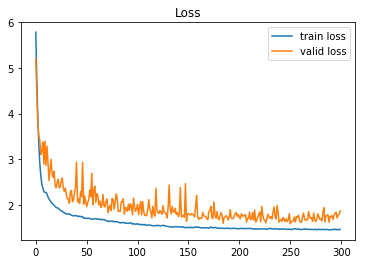

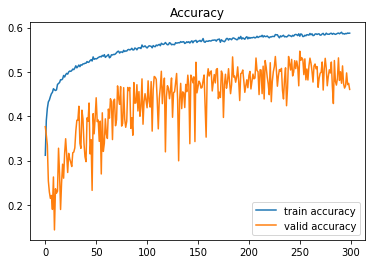

In [14]:


import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()